- Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
- Figure out if any preprocessing such as scaling would help here
- Draw elbow plot and from that figure out optimal value of k

In [53]:
from sklearn.datasets import load_iris
iris = load_iris()

In [54]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

We have to only use peral length and width so we can drop sepal


In [55]:
import pandas as pd
df= pd.DataFrame(iris.data,columns=iris.feature_names)

In [56]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [57]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)

In [79]:
df.head

<bound method NDFrame.head of      petal length (cm)  petal width (cm)  cluster
0             0.067797          0.041667        1
1             0.067797          0.041667        1
2             0.050847          0.041667        1
3             0.084746          0.041667        1
4             0.067797          0.041667        1
..                 ...               ...      ...
145           0.711864          0.916667        0
146           0.677966          0.750000        0
147           0.711864          0.791667        0
148           0.745763          0.916667        0
149           0.694915          0.708333        0

[150 rows x 3 columns]>

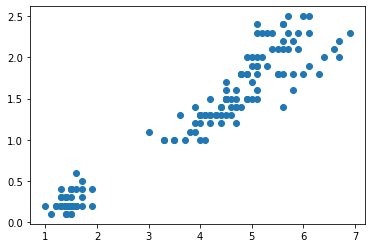

In [60]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

In [61]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [62]:
mms = MinMaxScaler()

In [78]:
mms.fit(df[['petal length (cm)']])
df['petal length (cm)']=mms.transform(df[['petal length (cm)']])

mms.fit(df[['petal width (cm)']])
df['petal width (cm)']=mms.transform(df[['petal width (cm)']])

df


,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


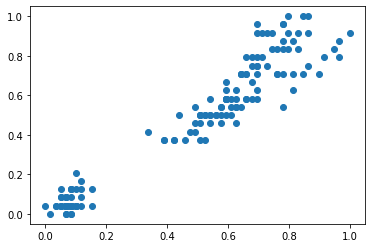

In [64]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])

## Elbow plot

In [65]:
# finding number of cluster required
sse=[]# sum of square erros
k_rng = range(1,10)
for i in k_rng:
    km=KMeans(n_clusters=i)
    km.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)# this inertia method gives sum of square error of the centroid
    

In [66]:
sse

[28.36835321972719,
 5.176463590044366,
 1.701874688192097,
 1.1588792731667128,
 0.8538617353912238,
 0.6798101576314028,
 0.5916639375110908,
 0.48580845539143697,
 0.4154845785171635]

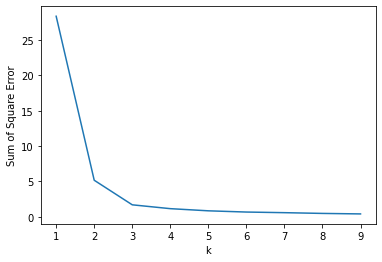

In [67]:
# ploting the lelbow graph
plt.xlabel('k')
plt.ylabel('Sum of Square Error')
plt.plot(k_rng,sse)

there elbow is at k=3 , So number of cluster will be 3

In [68]:
km= KMeans(n_clusters=3)                           

In [69]:
y_predicted= km.fit_predict(df[['petal length (cm)','petal width (cm)']])

In [70]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [71]:
df['cluster']=y_predicted

In [72]:
df.head()

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


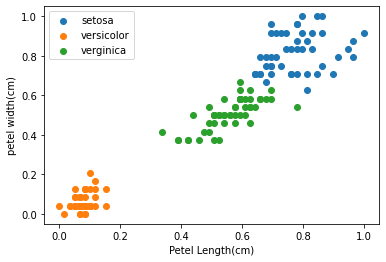

In [77]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],label='setosa')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],label='versicolor')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],label='verginica')

plt.xlabel('Petel Length(cm)')
plt.ylabel('petel width(cm)')

plt.legend()